<a href="https://colab.research.google.com/github/tomaru5963/colab/blob/master/MNIST_handwritten_wConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 4320)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               432100    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 433,890
Trainable params: 433,890
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.347

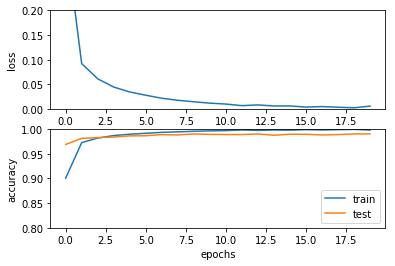

In [23]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.initializers import RandomNormal
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import Adam

BATCH_SIZE = 100
NUM_EPOCHS = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(30, 5,
                 strides=1, padding='valid',
                 activation='relu', input_shape=(28, 28, 1),
                 kernel_initializer=RandomNormal(stddev=0.01),
                 bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',
                kernel_initializer=RandomNormal(stddev=0.01),
                bias_initializer='zeros'))
model.add(Dense(10, activation='softmax',
                kernel_initializer=RandomNormal(stddev=0.01),
                bias_initializer='zeros'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))


# history.history
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# pd.Series(history.history['loss']).plot(ax=ax1)
# pd.DataFrame(zip(history.history['acc'], history.history['val_acc']),
#              columns=('acc', 'val_acc')).plot(ax=ax2)

x = np.arange(NUM_EPOCHS)
ax1.plot(x, history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_ylim(0, 0.2)
ax2.plot(x, history.history['acc'], label='train')
ax2.plot(x, history.history['val_acc'], label='test')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.set_ylim(0.8, 1.0)
ax2.legend(loc='lower right')
# plt.show()